<a href="https://colab.research.google.com/github/Andygrammer/Kaggle/blob/master/ML_Step0_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main description

The Titanic is the very first challenge of Kaggle competition.

"The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck."

Source: https://www.kaggle.com/c/titanic

# 1. Load libraries

In [0]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression

# 2. Load dataset

In [29]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Prepare data

In [0]:
vars = ['SEX_BINARY', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

train['Sex'].value_counts()

def convertSex(value):
  if (value == 'female'):
    return 1
  return 0

train['SEX_BINARY'] = train['Sex'].map(convertSex)
test['SEX_BINARY'] = test['Sex'].map(convertSex)

# Examples/Outputs
x = train[vars]
x = x.fillna(-1) # substitute NaN values by -1
y = train['Survived']


# 4. Create model

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Acc by validation step:  [0.8228699551569507, 0.8382022471910112, 0.8183856502242153, 0.8157303370786517, 0.8161434977578476, 0.8112359550561797, 0.8251121076233184, 0.8067415730337079, 0.8094170403587444, 0.8112359550561797, 0.8116591928251121, 0.8292134831460675, 0.8026905829596412, 0.8067415730337079, 0.7982062780269058, 0.8449438202247191, 0.8408071748878924, 0.797752808988764, 0.8094170403587444, 0.797752808988764]
Acc mean:  0.8157129540988561
Standard deviation:  0.013669417845784165
Populating the interactive namespace from numpy and matplotlib



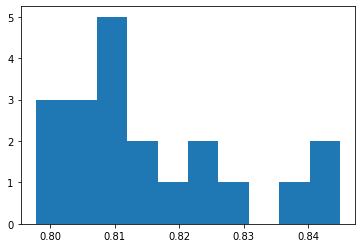

In [24]:
# Validation set 1 (random split)
#np.random.seed(0)
#x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.5)
#print("Acc: ", np.mean(y_valid == p))

# Validation set 2 (cross validation - K-fold)
results = []
k = RepeatedKFold(n_splits=2, n_repeats=10, random_state=0)
for examples, outputs in k.split(x):
  #print("Train: ", examples.shape[0])
  #print("Valid: ", outputs.shape[0])
  #print()
  x_train, x_valid = x.iloc[examples], x.iloc[outputs]
  y_train, y_valid = y.iloc[examples], y.iloc[outputs]

  # 4.1. training
  #model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0) # model 1: Random Forest with 100 decision trees
  model = LogisticRegression()
  model.fit(x_train, y_train)
  p = model.predict(x_valid)

  # 4.2. validation
  y_valid = np.mean(y_valid == p)
  results.append(y_valid)

print("Acc by validation step: ", results)
print("Acc mean: ", np.mean(results))
print("Standard deviation: ", np.std(results))

%pylab inline
pylab.hist(results)
print()

# 5. Error analysis

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Acc by validation step:  [0.8026905829596412, 0.8426966292134831, 0.7959641255605381, 0.8426966292134831, 0.7982062780269058, 0.8134831460674158, 0.8183856502242153, 0.8269662921348314, 0.8116591928251121, 0.8337078651685393, 0.8139013452914798, 0.8426966292134831, 0.8094170403587444, 0.8112359550561797, 0.8295964125560538, 0.8179775280898877, 0.8363228699551569, 0.8134831460674158, 0.8139013452914798, 0.8112359550561797]
Acc mean:  0.8193112309165114
Standard deviation:  0.014114527828076043


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


((array([2., 1., 1., 7., 2., 0., 1., 1., 2., 3.]),
  array([0.79596413, 0.80063738, 0.80531063, 0.80998388, 0.81465713,
         0.81933038, 0.82400363, 0.82867688, 0.83335013, 0.83802338,
         0.84269663]),
  <a list of 10 Patch objects>),
 (array([3., 3., 5., 2., 1., 2., 1., 0., 1., 2.]),
  array([0.79775281, 0.80247191, 0.80719101, 0.81191011, 0.81662921,
         0.82134831, 0.82606742, 0.83078652, 0.83550562, 0.84022472,
         0.84494382]),
  <a list of 10 Patch objects>))

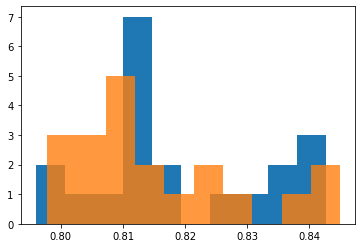

In [27]:
x_valid_check = train.iloc[outputs].copy()
x_valid_check['p'] = p
#x_valid_check.head()

errors = x_valid_check[x_valid_check['Survived'] != x_valid_check['p']]
errors = errors[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'SEX_BINARY', 'p', 'Survived']]
errors.head()

women = errors[errors['Sex'] == 'female']
men = errors[errors['Sex'] == 'male']
women.sort_values("Survived")

train['EMBARKED_S'] = (train['Embarked'] == 'S').astype(int)
train['EMBARKED_C'] = (train['Embarked'] == 'C').astype(int)
#train['EMBARKED_Q'] = (train['Embarked'] == 'Q').astype(int)

train['CABIN_NULL'] = train['Cabin'].isnull().astype(int)

train['NAME_MISS'] = train['Name'].str.contains("Miss").astype(int)
train['NAME_MRS'] = train['Name'].str.contains("Mrs").astype(int)
train['NAME_MR'] = train['Name'].str.contains("Mr").astype(int)
train['NAME_MASTER'] = train['Name'].str.contains("Master").astype(int)
train['NAME_COL'] = train['Name'].str.contains("Col").astype(int)
train['NAME_MAJOR'] = train['Name'].str.contains("Major").astype(int)

vars = ['SEX_BINARY', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'EMBARKED_S', 'EMBARKED_C', 'CABIN_NULL',
             'NAME_MISS', 'NAME_MRS',
             'NAME_MASTER', 'NAME_COL', 'NAME_MAJOR', 'NAME_MR']

x = train[vars].fillna(-1)
y = train['Survived']

results2 = []
k = RepeatedKFold(n_splits=2, n_repeats=10, random_state=1)
for examples, outputs in k.split(x):
  #print("Train: ", examples.shape[0])
  #print("Valid: ", outputs.shape[0])
  #print()
  x_train, x_valid = x.iloc[examples], x.iloc[outputs]
  y_train, y_valid = y.iloc[examples], y.iloc[outputs]

  # 4.1. training
  #model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  model = LogisticRegression()
  model.fit(x_train, y_train)
  p = model.predict(x_valid)

  # 4.2. validation
  y_valid = np.mean(y_valid == p)
  results2.append(y_valid)

print("Acc by validation step: ", results2)
print("Acc mean: ", np.mean(results2))
print("Standard deviation: ", np.std(results2))

pylab.hist(results2), pylab.hist(results,alpha=0.8)

# 6. Test model

In [0]:
train['EMBARKED_S'] = (train['Embarked'] == 'S').astype(int)
train['EMBARKED_C'] = (train['Embarked'] == 'C').astype(int)
#train['EMBARKED_Q'] = (train['Embarked'] == 'Q').astype(int)

train['CABIN_NULL'] = train['Cabin'].isnull().astype(int)

train['NAME_MISS'] = train['Name'].str.contains("Miss").astype(int)
train['NAME_MRS'] = train['Name'].str.contains("Mrs").astype(int)
train['NAME_MR'] = train['Name'].str.contains("Mr").astype(int)
train['NAME_MASTER'] = train['Name'].str.contains("Master").astype(int)
train['NAME_COL'] = train['Name'].str.contains("Col").astype(int)
train['NAME_MAJOR'] = train['Name'].str.contains("Major").astype(int)

#model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model = LogisticRegression()
model.fit(x, y)
p = model.predict(test[vars].fillna(-1))

# 7. Get results to submission

In [32]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape
sub.to_csv("Titanic1.csv", header=True)
!head -n10 Titanic1.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1
